In [1]:
import pandas as pd

In [2]:
from quoptuna import Optimizer
from quoptuna import DataPreparation


/Users/edwin.jose/Documents/GitHub/wmu_research/quoptuna/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
db_name = "corral"
study_name ="corral"
optimizer = Optimizer(db_name=db_name, study_name=study_name)

In [4]:
optimizer.storage_location

'sqlite:///db/corral.db'

In [5]:
optimizer.load_study()
study = optimizer.study

In [6]:
best_trial = study.best_trials

In [7]:
def format_trial(trial):
    quantum_f1_score = trial.user_attrs.get("Quantum_f1_score")
    classical_f1_score = trial.user_attrs.get("Classical_f1_score")
    f1_score = (
        quantum_f1_score
        if quantum_f1_score != 0
        else classical_f1_score
        if classical_f1_score != 0
        else "N/A"
    )
    return f"Trial {trial.number} " f"{trial.params.get('model_type')} " f"F1-Score {f1_score}"

In [8]:
for trial in best_trial:
    print(format_trial(trial))

Trial 8 QuantumKitchenSinks F1-Score 1.0
Trial 10 QuantumKitchenSinks F1-Score 1.0
Trial 11 QuantumKitchenSinks F1-Score 1.0
Trial 12 DressedQuantumCircuitClassifierSeparable F1-Score 1.0
Trial 16 QuantumKitchenSinks F1-Score 1.0
Trial 17 DressedQuantumCircuitClassifier F1-Score 1.0
Trial 20 QuantumKitchenSinks F1-Score 1.0
Trial 21 QuantumKitchenSinks F1-Score 1.0
Trial 23 QuantumKitchenSinks F1-Score 1.0
Trial 24 QuantumKitchenSinks F1-Score 1.0
Trial 25 QuantumKitchenSinks F1-Score 1.0
Trial 28 DataReuploadingClassifier F1-Score 1.0
Trial 29 ProjectedQuantumKernel F1-Score 1.0


In [9]:
model_params = best_trial[-1].params
model_params

{'max_vmap': 1,
 'batch_size': 32,
 'learning_rate': 0.001,
 'n_input_copies': 3,
 'n_layers': 1,
 'observable_type': 'half',
 'repeats': 1,
 'C': 1,
 'gamma_factor': 10,
 'trotter_steps': 3,
 't': 0.1,
 'n_qfeatures': 'full',
 'n_episodes': 100,
 'visible_qubits': 'full',
 'temperature': 10,
 'encoding_layers': 5,
 'degree': 4,
 'n_qchannels': 5,
 'qkernel_shape': 3,
 'kernel_shape': 5,
 'filter_name': 'edge_detect',
 'gamma': 0.001,
 'alpha': 0.0001,
 'hidden_layer_sizes': '(10, 10, 10, 10)',
 'eta0': 10,
 'model_type': 'ProjectedQuantumKernel'}

In [10]:
import os
os.listdir()

['test_analcatdata_creditscore.ipynb',
 'test_shap.ipynb',
 '.DS_Store',
 'test_corral.ipynb',
 'test.py',
 'test_matminer.ipynb',
 'db',
 'optimize_log.txt',
 'data',
 'test_credit_a.ipynb']

In [11]:
file_path ="data/corral.csv"
data = pd.read_csv(file_path)
data_prep = DataPreparation(file_path=file_path,
                            x_cols=list(data.columns.difference(["target"])),
                            y_col="target")

x, y = data_prep.select_columns()
x_train, x_test, y_train, y_test = data_prep.prepare_data()
data_dict = {
    "train_x": x_train,
    "test_x": x_test,
    "train_y": y_train,
    "test_y": y_test,
}

In [12]:
from quoptuna.backend.models import create_model
model = create_model(
    **model_params,
)

In [13]:
model.fit(data_dict.get("train_x"), data_dict.get("train_y"))

/Users/edwin.jose/Documents/GitHub/wmu_research/quoptuna/.venv/lib/python3.12/site-packages/pennylane/devices/default_qubit_jax.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.jax' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/Users/edwin.jose/Documents/GitHub/wmu_research/quoptuna/.venv/lib/python3.12/site-packages/pennylane/devices/default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.jax' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/Users/edwin.jose/Documents/GitHub/wmu_research/quoptuna/.venv/lib/python3.12/site-packages/pennylane/devices/default_qubit_jax.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.jax' is depr

ProjectedQuantumKernel(C=1, gamma_factor=10, max_vmap=1, t=0.1, trotter_steps=3)

In [14]:
from quoptuna import XAI

In [15]:
data_dict_xai={"x_train": pd.DataFrame(data_dict.get("train_x")),
               "y_train": pd.DataFrame(data_dict.get("train_y")),
               "x_test": pd.DataFrame(data_dict.get("test_x")),
               "y_test": pd.DataFrame(data_dict.get("test_y"))}
xai = XAI(model=model, data=data_dict_xai,onsubset=True)

In [16]:
xai.shap_values

/Users/edwin.jose/Documents/GitHub/wmu_research/quoptuna/.venv/lib/python3.12/site-packages/pennylane/devices/default_qubit_jax.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.jax' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/Users/edwin.jose/Documents/GitHub/wmu_research/quoptuna/.venv/lib/python3.12/site-packages/pennylane/devices/default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.jax' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/Users/edwin.jose/Documents/GitHub/wmu_research/quoptuna/.venv/lib/python3.12/site-packages/pennylane/devices/default_qubit_jax.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.jax' is depr

.values =
array([[[ 3.03819991e-01, -3.03819991e-01],
        [ 2.82468461e-01, -2.82468461e-01],
        [-1.38858259e-01,  1.38858259e-01],
        [ 5.17027794e-02, -5.17027794e-02],
        [ 1.69873198e-02, -1.69873198e-02],
        [-2.70203065e-04,  2.70203065e-04]],

       [[ 8.93005167e-02, -8.93005167e-02],
        [-3.33517877e-01,  3.33517877e-01],
        [ 7.17736609e-02, -7.17736609e-02],
        [-2.52578618e-01,  2.52578618e-01],
        [-2.35873173e-02,  2.35873173e-02],
        [-9.07470193e-03,  9.07470193e-03]],

       [[ 9.32770430e-02, -9.32770430e-02],
        [-3.24421440e-01,  3.24421440e-01],
        [-3.01290438e-01,  3.01290438e-01],
        [ 7.86498666e-02, -7.86498666e-02],
        [-1.37610623e-02,  1.37610623e-02],
        [ 1.02635384e-02, -1.02635384e-02]],

       ...,

       [[ 3.33434132e-01, -3.33434132e-01],
        [ 3.09566931e-01, -3.09566931e-01],
        [-6.85559153e-02,  6.85559153e-02],
        [-6.54921019e-02,  6.54921019e-02],
   

In [19]:
xai.shap_values.values.ndim

3

AttributeError: 'int' object has no attribute 'split'

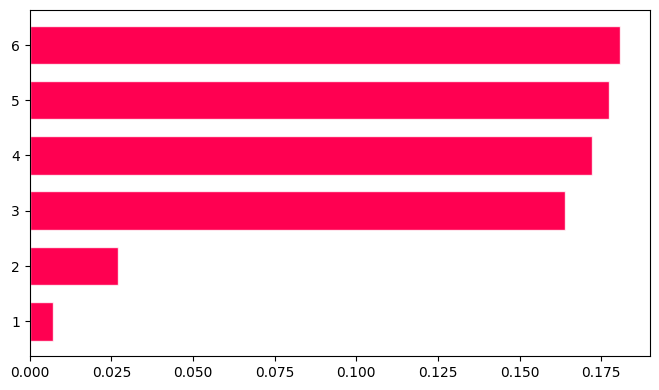

In [20]:
xai.get_bar_plot()

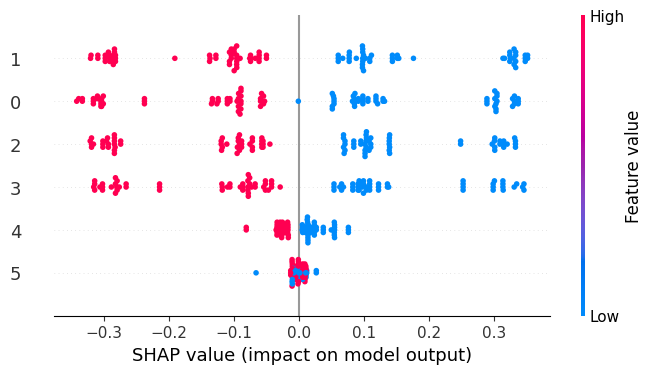

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [21]:
xai.get_beeswarm_plot()